In [ ]:
import librosa
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
n_mfcc = 40
n_fft = 512  # setting the FFT size to 1024
hop_length = 10*16 # 25ms*16khz samples has been taken
win_length = 30*16 #25ms*16khz samples has been taken for window length
window = 'hann' #hann window used
n_chroma=12
n_mels=128
n_bands=7 #we are extracting the 7 features out of the spectral contrast
fmin=100
bins_per_ocatve=12

In [ ]:
!pip install soundfile

In [ ]:

# Define function to extract features
def extract_features(file_path):
    try:
        # Load audio file and extract features
        y, sr = librosa.load(file_path, sr=16000)
                # Adjust n_fft if the input signal is shorter than n_fft
        n_fft_adjusted = n_fft if len(y) >= n_fft else len(y)
        if n_fft_adjusted != n_fft:
            print(f"Adjusted n_fft to {n_fft_adjusted} due to input signal length")

        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window=window).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window='hann', n_mels=n_mels).T, axis=0)
        stft = np.abs(librosa.stft(y))
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, y=y, sr=sr).T, axis=0)
        contrast = np.mean(librosa.feature.spectral_contrast(S=stft, y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=win_length, n_bands=n_bands, fmin=fmin).T, axis=0)
        tonnetz = np.mean(librosa.feature.tonnetz(y=y, sr=sr).T, axis=0)
        features = {
            'mfcc': mfcc,
            'chroma': chroma,
            'mel': mel,
            'contrast': contrast,
            'tonnetz': tonnetz
        }
        return features
    except Exception as e:
        print(f"Error: Exception occurred in feature extraction: {e}")
        return None
import zipfile
import os
# Define path to the zip file
zip_file_path = '/content/drive/MyDrive/Baby_Chilanto.zip'

# Extract the contents of the zip file to a temporary directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_data')

# Define path to the extracted directory
extracted_path = '/content/extracted_data/Baby_Chilanto'

# Initialize empty lists to hold extracted features and labels
features = []
labels = []
file_paths = []

# Loop through the directories in the extracted directory
for label in os.listdir(extracted_path):
    label_path = os.path.join(extracted_path, label)
    if os.path.isdir(label_path):  # Check if it's a directory
        # Loop through the files in each directory
        print(f"{label} data is loading.....")
        for file_name in os.listdir(label_path):
            file_path = os.path.join(label_path, file_name)
            # Extract features and append to list
            feature_dict = extract_features(file_path)
            if feature_dict is not None:
                features.append(feature_dict)
                labels.append(label)
                file_paths.append(file_path)
        print(f"{label} data loaded....")

Asphyxia data is loading.....


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=250
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Asphyxia data loaded....
Deaf data is loading.....


<ipython-input-29-42a80e8bbb9d>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error: Exception occurred in feature extraction: 


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=250
  warnings.warn(
<ipython-input-29-42a80e8bbb9d>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error: Exception occurred in feature extraction: 


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=250
  warnings.warn(
<ipython-input-29-42a80e8bbb9d>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error: Exception occurred in feature extraction: 


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=250
  warnings.warn(
<ipython-input-29-42a80e8bbb9d>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error: Exception occurred in feature extraction: 


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=250
  warnings.warn(
<ipython-input-29-42a80e8bbb9d>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error: Exception occurred in feature extraction: 


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=250
  warnings.warn(
<ipython-input-29-42a80e8bbb9d>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=16000)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error: Exception occurred in feature extraction: 


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=500
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=512 is too large for input signal of length=250
  warnings.warn(


Deaf data loaded....
Hunger data is loading.....
Hunger data loaded....
Pain data is loading.....
Pain data loaded....
Normal data is loading.....
Normal data loaded....


In [ ]:
df = pd.DataFrame(features)
df['label'] = labels
df['file_path'] = file_paths

# Save DataFrame to CSV if needed
df.to_csv('extracted_features_chilanto.csv', index=False)

print("Feature extraction and labeling completed.")
df.shape
print(df.sample(2))

Feature extraction and labeling completed.
                                                  mfcc  \
40   [-582.31573, 126.664474, -39.689137, 56.57268,...   
547  [-294.00882, 14.03098, -135.34026, 46.86263, -...   

                                                chroma  \
40   [0.445541, 0.54254514, 0.6933689, 0.744752, 0....   
547  [0.6437942, 0.47967133, 0.40803748, 0.29448828...   

                                                   mel  \
40   [0.01020002, 0.006481822, 0.0026946762, 0.0017...   
547  [0.0050786175, 0.0026741135, 0.0002036052, 0.0...   

                                              contrast  \
40   [14.999417075061313, 12.584892372548548, 18.47...   
547  [26.582414888844937, 9.669822929872435, 10.493...   

                                               tonnetz     label  \
40   [-0.04811121353225245, 0.0006647851656098253, ...  Asphyxia   
547  [0.03542279278662925, -0.07900617209569141, 0....      Deaf   

                                             file_pa

In [ ]:
def expand_features(df, feature_name):
    feature_df = pd.DataFrame(df[feature_name].tolist(), index=df.index)
    feature_df.columns = [f"{feature_name}_{i}" for i in range(feature_df.shape[1])]
    return feature_df

mfcc_df = expand_features(df, 'mfcc')
chroma_df = expand_features(df, 'chroma')
mel_df = expand_features(df, 'mel')
contrast_df = expand_features(df, 'contrast')
tonnetz_df = expand_features(df, 'tonnetz')

expanded_df = pd.concat([mfcc_df, chroma_df, mel_df, contrast_df, tonnetz_df], axis=1)
expanded_df['label'] = df['label']
expanded_df['file_path'] = df['file_path']

X = expanded_df.drop(columns=['label', 'file_path'])
y = expanded_df['label']

In [ ]:
expanded_df.head()

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,contrast_6,contrast_7,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,label,file_path
0,-634.854004,114.202507,5.520142,23.072763,-2.578430,16.535059,6.879473,19.656445,16.601713,8.223090,...,56.579241,11.684842,-0.029908,0.009073,0.010741,0.037024,0.030071,-0.006457,Asphyxia,/content/extracted_data/Baby_Chilanto/Asphyxia...
1,-347.254150,140.188385,-43.430260,51.777508,-11.735666,38.771275,-0.896808,-0.705179,-4.414794,11.615410,...,59.589012,13.841756,-0.051934,0.030453,0.049331,0.003488,-0.017247,0.019753,Asphyxia,/content/extracted_data/Baby_Chilanto/Asphyxia...
2,-599.558655,107.098534,-3.288518,14.999630,-15.384158,27.470873,11.075841,25.619825,13.760100,5.547490,...,60.813985,14.935378,0.055368,0.013907,-0.100993,-0.034365,-0.004720,-0.039743,Asphyxia,/content/extracted_data/Baby_Chilanto/Asphyxia...
3,-341.403351,175.729446,-42.413082,47.979233,-34.533451,29.958241,-19.977484,9.859727,2.356104,-0.551470,...,60.188090,11.881736,0.004846,0.024738,0.045031,-0.034685,-0.009975,0.014722,Asphyxia,/content/extracted_data/Baby_Chilanto/Asphyxia...
4,-659.499329,136.141144,-21.509981,53.145031,-15.513071,35.959049,-3.170867,21.991699,9.256365,-7.568463,...,61.171412,10.032168,-0.103084,-0.115883,-0.101111,-0.095812,0.053698,-0.035962,Asphyxia,/content/extracted_data/Baby_Chilanto/Asphyxia...


In [ ]:
from imblearn.over_sampling import RandomOverSampler
X = expanded_df.drop(columns=['label', 'file_path'])
y = expanded_df['label']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['label'] = y_resampled
csv_file_path = 'balanced_extracted_features_chilanto.csv'
df_resampled.to_csv(csv_file_path, index=False)
df_resampled.head()

<ipython-input-33-7db3c82d8188>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_resampled['label'] = y_resampled


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,contrast_5,contrast_6,contrast_7,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,label
0,-634.854004,114.202507,5.520142,23.072763,-2.578430,16.535059,6.879473,19.656445,16.601713,8.223090,...,16.897375,56.579241,11.684842,-0.029908,0.009073,0.010741,0.037024,0.030071,-0.006457,Asphyxia
1,-347.254150,140.188385,-43.430260,51.777508,-11.735666,38.771275,-0.896808,-0.705179,-4.414794,11.615410,...,20.889910,59.589012,13.841756,-0.051934,0.030453,0.049331,0.003488,-0.017247,0.019753,Asphyxia
2,-599.558655,107.098534,-3.288518,14.999630,-15.384158,27.470873,11.075841,25.619825,13.760100,5.547490,...,15.808183,60.813985,14.935378,0.055368,0.013907,-0.100993,-0.034365,-0.004720,-0.039743,Asphyxia
3,-341.403351,175.729446,-42.413082,47.979233,-34.533451,29.958241,-19.977484,9.859727,2.356104,-0.551470,...,15.653203,60.188090,11.881736,0.004846,0.024738,0.045031,-0.034685,-0.009975,0.014722,Asphyxia
4,-659.499329,136.141144,-21.509981,53.145031,-15.513071,35.959049,-3.170867,21.991699,9.256365,-7.568463,...,15.685612,61.171412,10.032168,-0.103084,-0.115883,-0.101111,-0.095812,0.053698,-0.035962,Asphyxia


In [ ]:
df['label'].value_counts()

label
Deaf        879
Normal      507
Hunger      350
Asphyxia    340
Pain        192
Name: count, dtype: int64

In [ ]:
df_resampled['label'].value_counts()

label
Asphyxia    879
Deaf        879
Hunger      879
Pain        879
Normal      879
Name: count, dtype: int64

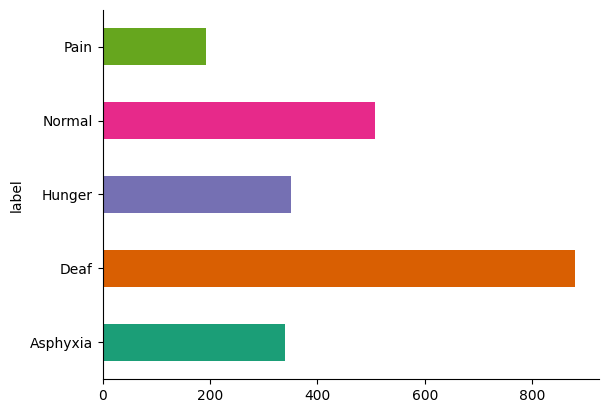

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
expanded_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

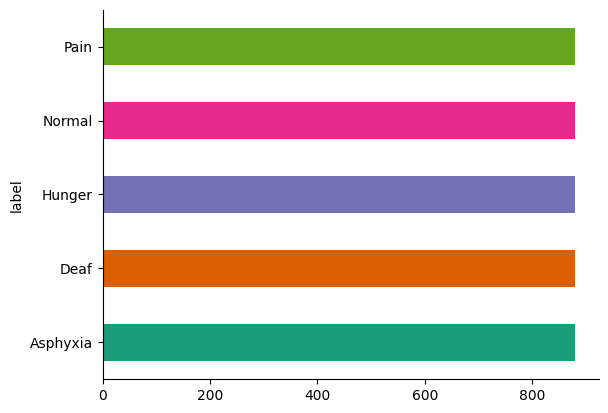

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df_resampled.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

Accuracy of KNeighborsClassifier: 98.97610921501706
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.99      0.98      0.99       190
        Deaf       0.99      1.00      1.00       186
      Hunger       1.00      0.97      0.98       169
      Normal       0.99      0.99      0.99       167
        Pain       0.97      1.00      0.99       167

    accuracy                           0.99       879
   macro avg       0.99      0.99      0.99       879
weighted avg       0.99      0.99      0.99       879



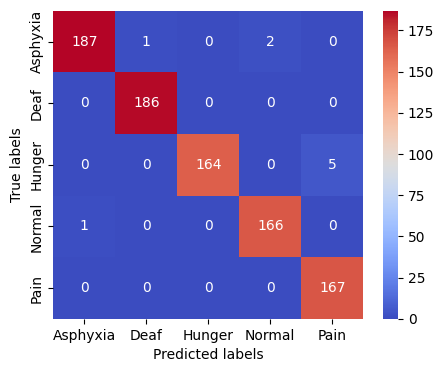

In [ ]:
#KNN
from sklearn.metrics import classification_report,confusion_matrix
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
print(f"Accuracy of KNeighborsClassifier: {accuracy_score(y_test,y_pred)*100}")
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)
conf_matrix_1 = confusion_matrix(y_test, y_pred)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_1, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of RandomForestClassifier: 99.20364050056882
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.97      0.99      0.98       190
        Deaf       0.99      1.00      1.00       186
      Hunger       1.00      0.99      1.00       169
      Normal       1.00      0.97      0.98       167
        Pain       0.99      1.00      1.00       167

    accuracy                           0.99       879
   macro avg       0.99      0.99      0.99       879
weighted avg       0.99      0.99      0.99       879



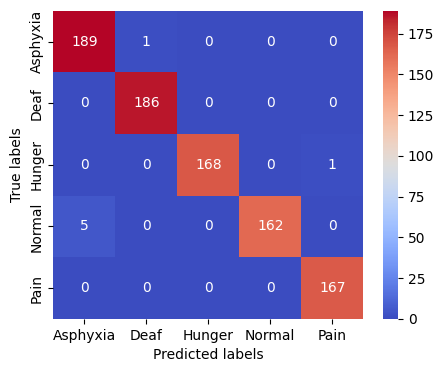

In [ ]:
#RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
rfc = RandomForestClassifier(n_estimators=120, random_state = 110)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(f"Accuracy of RandomForestClassifier: {accuracy_score(y_test,y_pred)*100}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_2, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of Linear SVC: 96.13196814562002
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.98      0.99      0.99       190
        Deaf       1.00      1.00      1.00       186
      Hunger       0.94      0.88      0.91       169
      Normal       0.99      0.97      0.98       167
        Pain       0.89      0.95      0.92       167

    accuracy                           0.96       879
   macro avg       0.96      0.96      0.96       879
weighted avg       0.96      0.96      0.96       879



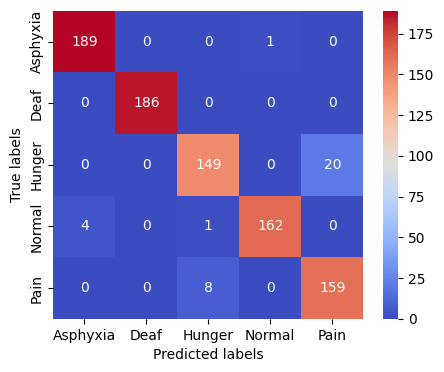

In [ ]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc_model = SVC(kernel = 'linear', random_state=15)
svc_model.fit(X_train,y_train)
y_pred = svc_model.predict(X_test)
print(f"Accuracy of Linear SVC: {accuracy_score(y_test,y_pred)*100}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_3 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_3, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of PCA: 91.12627986348123
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.95      0.98      0.97       190
        Deaf       0.99      1.00      1.00       186
      Hunger       0.80      0.82      0.81       169
      Normal       0.97      0.94      0.95       167
        Pain       0.83      0.80      0.81       167

    accuracy                           0.91       879
   macro avg       0.91      0.91      0.91       879
weighted avg       0.91      0.91      0.91       879



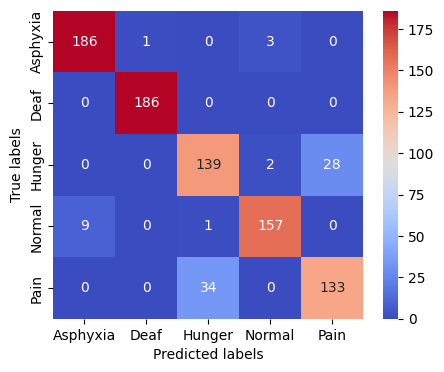

In [ ]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=45)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
svm_classifier = SVC(kernel='linear', C=3.7)
svm_classifier.fit(X_train_pca, y_train)
y_pred = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of PCA: {accuracy*100}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_4 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_4, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of DecisionTree: 98.40728100113766
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.99      0.99      0.99       190
        Deaf       0.99      0.99      0.99       186
      Hunger       0.99      0.95      0.97       169
      Normal       0.97      0.99      0.98       167
        Pain       0.97      0.99      0.98       167

    accuracy                           0.98       879
   macro avg       0.98      0.98      0.98       879
weighted avg       0.98      0.98      0.98       879



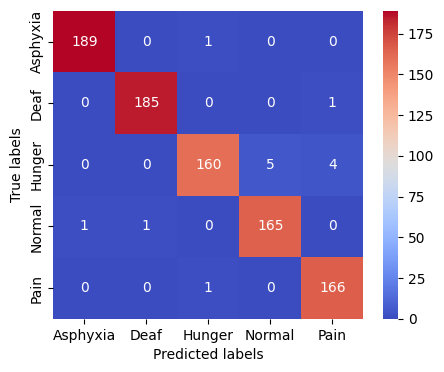

In [ ]:
#DT
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=40)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of DecisionTree: {accuracy*100}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_5 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_5, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of AdaBoostClassifier: 53.12855517633675
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.88      0.43      0.57       190
        Deaf       0.70      0.99      0.82       186
      Hunger       0.35      0.92      0.51       169
      Normal       0.61      0.28      0.38       167
        Pain       0.00      0.00      0.00       167

    accuracy                           0.53       879
   macro avg       0.51      0.52      0.46       879
weighted avg       0.52      0.53      0.47       879



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


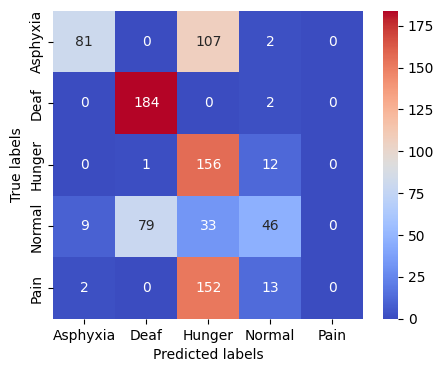

In [ ]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
abc = AdaBoostClassifier(n_estimators=300,learning_rate=2)
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
print(f"Accuracy of AdaBoostClassifier: {accuracy_score(y_test,y_pred)*100}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_6 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_6, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of ExtraTreesClassifier: 99.43%
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.98      0.99      0.99       190
        Deaf       0.99      1.00      1.00       186
      Hunger       1.00      0.99      1.00       169
      Normal       1.00      0.98      0.99       167
        Pain       0.99      1.00      1.00       167

    accuracy                           0.99       879
   macro avg       0.99      0.99      0.99       879
weighted avg       0.99      0.99      0.99       879



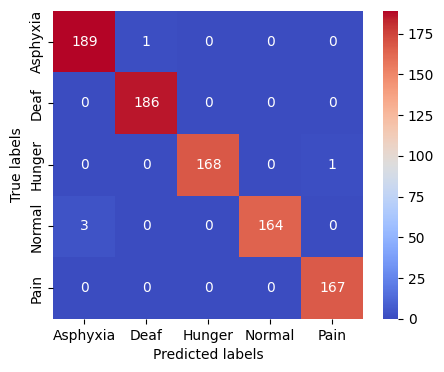

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix
extra_trees = ExtraTreesClassifier(random_state=30)
extra_trees.fit(X_train, y_train)
y_pred = extra_trees.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of ExtraTreesClassifier: {accuracy * 100:.2f}%")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_7 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_7, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names,fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of GMMClassifier: 93.63%
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.99      0.89      0.94       190
        Deaf       0.79      0.98      0.87       186
      Hunger       0.98      0.91      0.94       169
      Normal       0.99      0.90      0.94       167
        Pain       1.00      0.99      1.00       167

    accuracy                           0.94       879
   macro avg       0.95      0.94      0.94       879
weighted avg       0.95      0.94      0.94       879



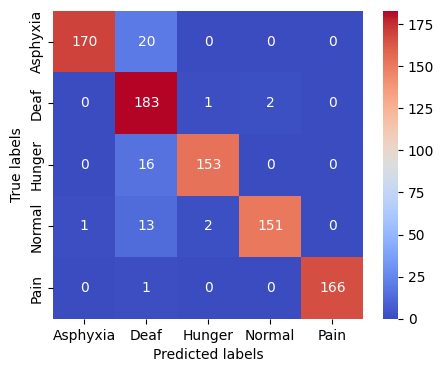

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

class GMMClassifier:
    def __init__(self, n_components=5, random_state=30):
        self.n_components = n_components
        self.random_state = random_state
        self.models = []

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        for label in self.classes_:
            gmm = GaussianMixture(n_components=self.n_components, random_state=self.random_state)
            gmm.fit(X[y == label])
            self.models.append(gmm)

    def predict(self, X):
        likelihoods = np.array([model.score_samples(X) for model in self.models]).T
        return self.classes_[np.argmax(likelihoods, axis=1)]

gmm_classifier = GMMClassifier()
gmm_classifier.fit(X_train, y_train)
y_pred = gmm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of GMMClassifier: {accuracy * 100:.2f}%")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_8 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_8, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Accuracy of Stoichastic Gradient Descent: 93.28782707622298
Classification Report:
               precision    recall  f1-score   support

    Asphyxia       0.96      0.97      0.97       190
        Deaf       1.00      0.97      0.98       186
      Hunger       0.85      0.89      0.87       169
      Normal       0.99      0.93      0.96       167
        Pain       0.87      0.89      0.88       167

    accuracy                           0.93       879
   macro avg       0.93      0.93      0.93       879
weighted avg       0.94      0.93      0.93       879



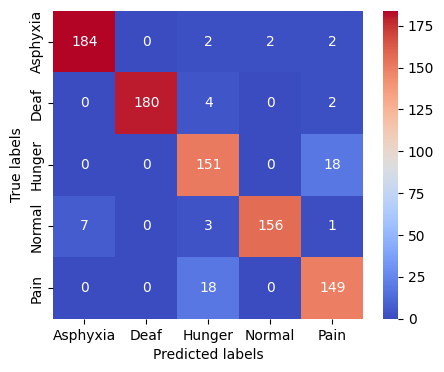

In [ ]:
#SGD
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=1000, random_state=55)
sgd_classifier.fit(X_train_scaled, y_train)
y_pred = sgd_classifier.predict(X_test_scaled)
print(f"Accuracy of Stoichastic Gradient Descent: {accuracy_score(y_test, y_pred)*100}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_9 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_9, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Accuracy of XGBoostClassifier: 98.75%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       190
           1       1.00      1.00      1.00       186
           2       0.99      0.97      0.98       169
           3       1.00      0.97      0.98       167
           4       0.97      1.00      0.99       167

    accuracy                           0.99       879
   macro avg       0.99      0.99      0.99       879
weighted avg       0.99      0.99      0.99       879



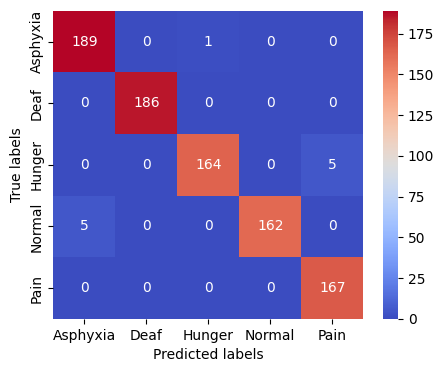

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
xgb_classifier = XGBClassifier(random_state=30, use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train_encoded)
y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy of XGBoostClassifier: {accuracy * 100:.2f}%")
report = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", report)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_10 = confusion_matrix(y_test_encoded, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_10, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49469
[LightGBM] [Info] Number of data points in the train set: 3516, number of used features: 194
[LightGBM] [Info] Start training from score -1.629838
[LightGBM] [Info] Start training from score -1.624049
[LightGBM] [Info] Start training from score -1.599814
[LightGBM] [Info] Start training from score -1.597001
[LightGBM] [Info] Start training from score -1.597001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

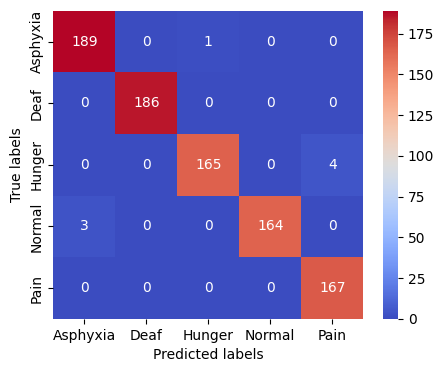

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lgb_classifier = lgb.LGBMClassifier(random_state=30)
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"Accuracy of LightGBM Classifier: {accuracy_lgb * 100:.2f}%")

report_lgb = classification_report(y_test, y_pred_lgb)
print("Classification Report for LightGBM Classifier:\n", report_lgb)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_11 = confusion_matrix(y_test, y_pred_lgb)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_11, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy of MLP Classifier: 98.52%
Classification Report for MLP Classifier:
               precision    recall  f1-score   support

    Asphyxia       0.98      0.99      0.99       190
        Deaf       1.00      1.00      1.00       186
      Hunger       0.99      0.95      0.97       169
      Normal       1.00      0.98      0.99       167
        Pain       0.95      1.00      0.97       167

    accuracy                           0.99       879
   macro avg       0.99      0.98      0.98       879
weighted avg       0.99      0.99      0.99       879



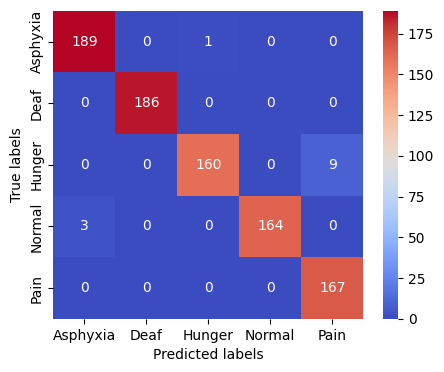

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=30)
mlp_classifier.fit(X_train, y_train)
y_pred_mlp = mlp_classifier.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy of MLP Classifier: {accuracy_mlp * 100:.2f}%")

report_mlp = classification_report(y_test, y_pred_mlp)
print("Classification Report for MLP Classifier:\n", report_mlp)
label_names = ['Asphyxia','Deaf','Hunger','Normal','Pain']
conf_matrix_12 = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_12, annot=True, cmap='coolwarm', xticklabels=label_names, yticklabels=label_names, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

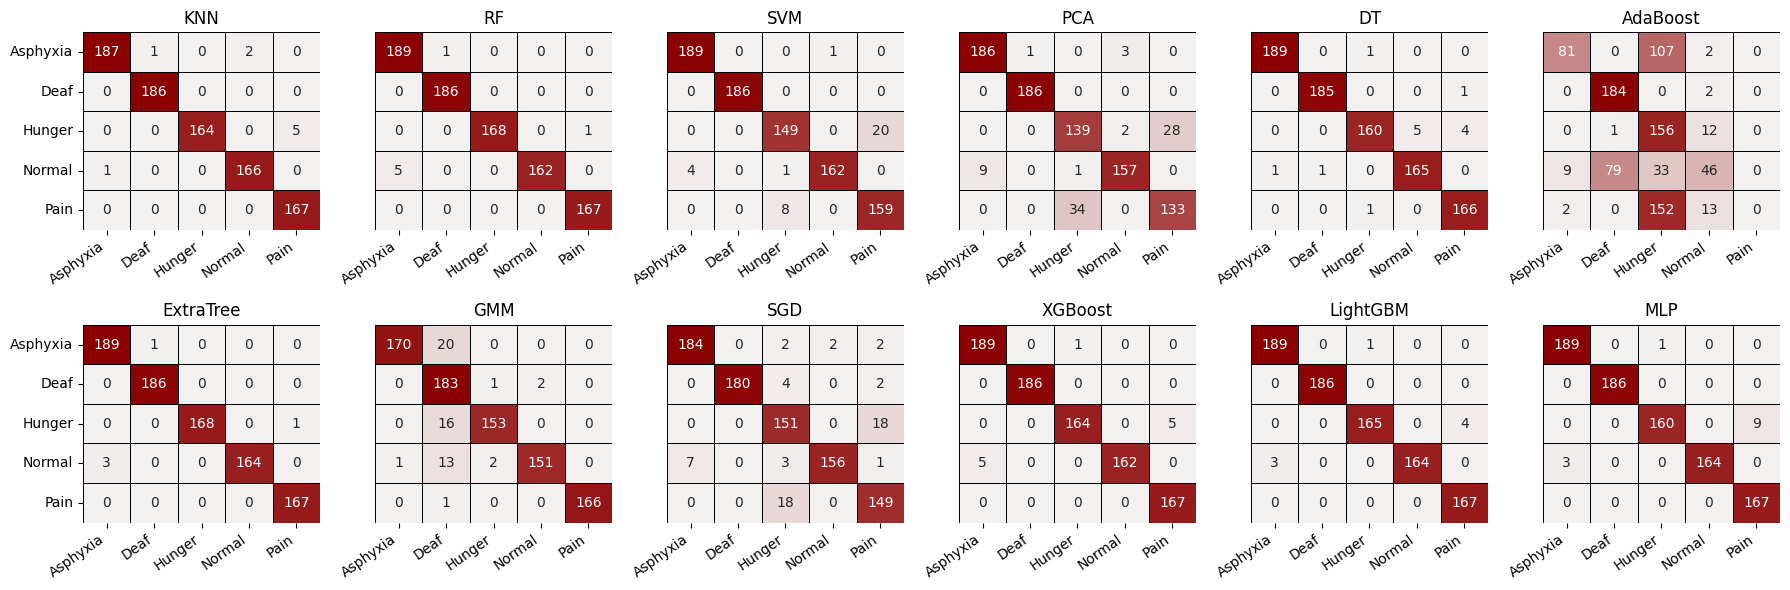

In [ ]:
fig, axes = plt.subplots(2, 6, figsize=(18, 6))

# List of classifiers and their respective confusion matrices
classifiers = ["KNN", "RF", "SVM", "PCA", "DT", "AdaBoost", "ExtraTree","GMM","SGD","XGBoost","LightGBM","MLP",]
confusion_matrices = [conf_matrix_1, conf_matrix_2, conf_matrix_3, conf_matrix_4, conf_matrix_5, conf_matrix_6, conf_matrix_7,conf_matrix_8,conf_matrix_9, conf_matrix_10, conf_matrix_11,conf_matrix_12]

cmap = sns.light_palette("darkred", as_cmap=True)

for i, ax in enumerate(axes.flatten()):
    # Plot y labels only for the first matrix in each row
    if i == 0 or i==6:
        sns.heatmap(confusion_matrices[i], annot=True, fmt='d', xticklabels=label_names, yticklabels=label_names,cmap=cmap, linewidths=.6, linecolor='black', ax=ax,cbar=False)
    else:
        sns.heatmap(confusion_matrices[i], annot=True, fmt='d',cmap=cmap, linewidths=.6, linecolor='black', xticklabels=label_names ,yticklabels=False, ax=ax,cbar=False)

    ax.set_title(classifiers[i])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')


# Adjust layout
plt.tight_layout()
plt.show()